In [91]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
% delete phreeqcrunfile
%system("rm porttest.txt");

In [92]:
database=['llnl.dat'];

from phreeqc support site

https://phreeqcusers.org/index.php?topic=2260.0

this assumes just CO2(g)=CO2(aq) but the database is CO2(g)+H2O=HCO3+H

so I had to do some fiddlign to get it to come to a reasoanble pH.  the PCO2 is not 10^-3.5 but 10^2.895 !

In [93]:
fromwebtext=[...
{'RATES\n'}
{'CO2_dissolution\n'}
{'20 k = parm(2) / 86400\n'}
{'30 eq_HCO3 = 10^PARM(1)*10^LK_PHASE("CO2(g)")/ACT("H+")\n'}
{'40 act_HCO3 = ACT("HCO3-")\n'}
{'50 moles = k * (eq_HCO3 - act_HCO3) * TIME\n'}
{'60 SAVE moles\n'}
{'END\n'}
{'SOLUTION\n'}
{'       pe      13.75\n'}
{'       pH      7\n'}
{'       temp    25\n'}
{'-units mol/kgw\n'}
{'KINETICS\n'}
{'CO2_dissolution\n'}
{'-formula CO2 1\n'}
{'-parm -3.5 1 # target log PCO2(g), rate constant 1/day\n'}
{'-time 1500000 in 100\n'}
];
[nolines,length]=size(fromwebtext);

In [94]:
selectboxtext=[...
{' SELECTED_OUTPUT\n'}
{' -file CO2out.txt\n'}
{' -selected_out true\n'}
{' -user_punch true\n'}
{' -high_precision true\n'}
{' -reset false\n'}
{' -simulation false\n'}
{' -state false\n'}
{' -distance false\n'}
{' -time false\n'}
{' -step false\n'}
{' -ph false\n'}
{' -pe false\n'}
{' -reaction false\n'}
{' -temperature false\n'}
{' -alkalinity false\n'}
{' -ionic_strength false\n'}
{' -water false\n'}
{' -charge_balance false\n'}
{' -percent_error false\n'}
];
[nolinesSEL,length]=size(selectboxtext);

In [95]:
punchboxtext=[...
{'USER_PUNCH\n'}
{'        -headings seconds  pH  logHCO3 logCO3 logH2CO3 \n'}
{'  10 PUNCH SIM_TIME, -LA("H+"), LA("HCO3-"), LA("CO3-2"), LA("H2CO3")\n'}
];
[nolinesPUNCH,length]=size(punchboxtext);

In [96]:
fileID=fopen('CO2test.txt','w');

fprintf(fileID,'TITLE TEST CO2 DISSOLUTION\n');

for i=1:nolines
    line=cell2mat(fromwebtext(i,:));
    fprintf(fileID,line)
end

fprintf(fileID,'\n');
for i=1:nolinesSEL
    line=cell2mat(selectboxtext(i,:));
    fprintf(fileID,line)
end

fprintf(fileID,'\n');
for i=1:nolinesPUNCH
    line=cell2mat(punchboxtext(i,:));
    fprintf(fileID,line)
end

fclose(fileID);

In [97]:
str=['system("phreeqc CO2test.txt out.txt ', database,'");'];
eval(str); % output to the screen
%evalc(str); % so no screen output
fid = fopen('CO2out.txt','rt');
hdr = strtrim(regexp(fgetl(fid),'\t','split'));
hdr=hdr(1:5)';
mat = cell2mat(textscan(fid,repmat('%f',1,numel(hdr))));
[nsize,msize]=size(mat);
time=mat(2:nsize,1); pHphreeqc=mat(2:nsize,2); HCO3=10.^(mat(2:nsize,3)); CO3=10.^(mat(2:nsize,4)); H2CO3=10.^(mat(2:nsize,5));
CT=HCO3+H2CO3+CO3;

pHequil = 5.6500e+00


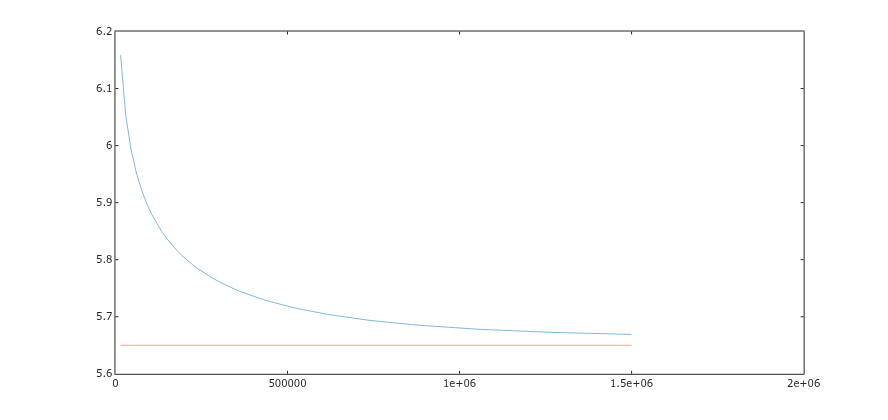

In [98]:
pHequil=-log10(sqrt(10^-3.5*10^-1.5*10^-6.3))
plot(time,pHphreeqc,time,pHequil.*ones(size(time)))

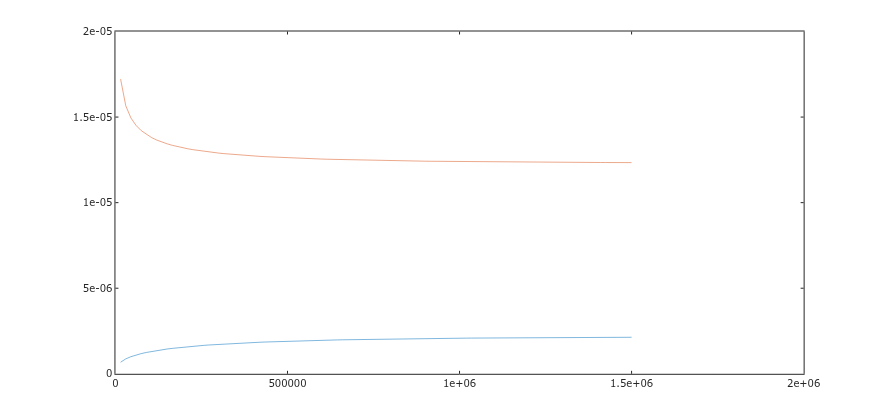

ERROR: received unknown message
Message type: usage_request


In [99]:
H=10.^-pHphreeqc;
H2CO3mod =(10^-3.5)*(10^-1.5);
HCO3mod = (H2CO3mod*(10^-6.3))./H;
CO3mod = (HCO3mod*(10^-10.3))./H;
CTmod=H2CO3mod+HCO3mod+CO3mod;

plot(time,CT,time,CTmod)
